<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-RNN%20for%204%20class%20classifications%20based%20on%20WSNBFSF%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-RNN for 4 class classifications based on WSNBFSF dataset**

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Load dataset
dataset = pd.read_csv("dataset.csv")
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

In [15]:
dataset["Class"].unique()

array([0, 1, 2, 3])

### **Data Preprocessing**

In [16]:
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=4)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(312106, 17)
(312106, 4)


In [17]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Hybrid combination of LR-RNN for 4 class classifications**

In [20]:
# Hybrid LR-CNN model
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, np.argmax(y_train, axis=1)) # modify y_train to 1D array

X_train_cnn = X_train.reshape(X_train.shape[0], -1)
X_test_cnn = X_test.reshape(X_test.shape[0], -1)

model_cnn = Sequential()
model_cnn.add(Dense(128, activation='relu', input_shape=(X_train_cnn.shape[1],)))
model_cnn.add(Dense(4, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train_cnn, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test_cnn, y_test))

# Combine models
y_pred_lr = model_lr.predict(X_test)
y_pred_lr = np.reshape(y_pred_lr, (y_pred_lr.shape[0], 1)) # add this line
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred = (y_pred_lr + y_pred_cnn) / 2
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/10
13143/13143 [==============================] - 32s 2ms/step - loss: 0.9003 - accuracy: 0.7309 - val_loss: 1.1150 - val_accuracy: 0.5839
Epoch 2/10
13143/13143 [==============================] - 30s 2ms/step - loss: 0.4992 - accuracy: 0.8167 - val_loss: 0.3290 - val_accuracy: 0.8876
Epoch 3/10
13143/13143 [==============================] - 31s 2ms/step - loss: 0.3571 - accuracy: 0.8587 - val_loss: 0.4361 - val_accuracy: 0.8241
Epoch 4/10
13143/13143 [==============================] - 31s 2ms/step - loss: 0.2769 - accuracy: 0.8889 - val_loss: 0.2750 - val_accuracy: 0.8782
Epoch 5/10
13143/13143 [==============================] - 30s 2ms/step - loss: 0.2303 - accuracy: 0.9117 - val_loss: 0.1821 - val_accuracy: 0.9398
Epoch 6/10
13143/13143 [==============================] - 31s 2ms/step - loss: 0.2117 - accuracy: 0.9209 - val_loss: 0.4269 - val_accuracy: 0.8329
Epoch 7/10
13143/13143 [==============================] - 31s 2ms/step - loss: 0.2059 - accuracy: 0.9238 - val_loss: 0

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid LR-RNN Model


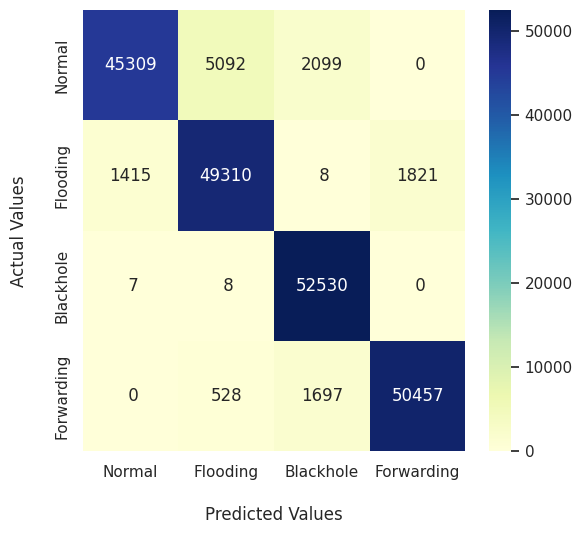

In [22]:
print("Confusion Matrix of Hybrid LR-RNN Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)

In [23]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(4):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.8630285714285715, 1: 0.9382730144232598, 2: 0.9997145304025121, 3: 0.9577654606886603}


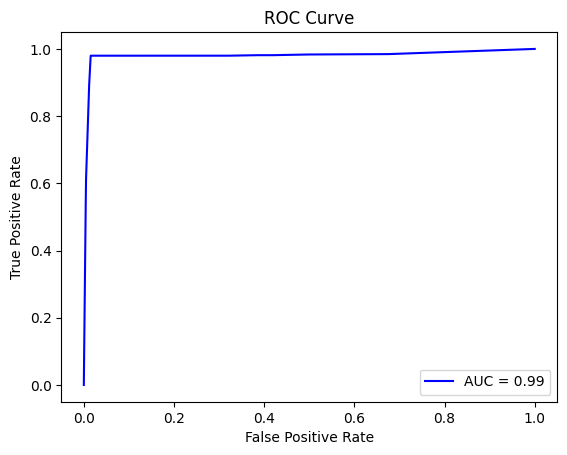

In [12]:
# ROC Curve and AUC Score
y_scores = final_model.predict_proba(combined_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1], pos_label=1)
#roc_auc = roc_auc_score(y_test, y_scores[:, 1])
roc_auc = roc_auc_score(y_test,y_scores, multi_class='ovr')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

#clf = LogisticRegression(solver="liblinear").fit(x_train, y_train)
#preds = clf.predict_proba(x_test)
#print(roc_auc)